### Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer

### Loading Dataset

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/fastapi-demo-api/refs/heads/main/insurance.csv')

### Data Exploration

In [63]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         100 non-null    int64  
 1   weight                      100 non-null    float64
 2   height                      100 non-null    float64
 3   income_lpa                  100 non-null    float64
 4   smoker                      100 non-null    bool   
 5   city                        100 non-null    object 
 6   occupation                  100 non-null    object 
 7   insurance_premium_category  100 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 5.7+ KB


#### Co-relation Heatmap

<Axes: >

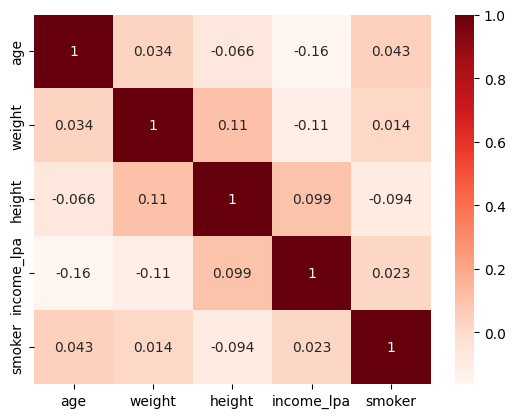

In [65]:
df_corr = df.corr(numeric_only = True)
sns.heatmap(df_corr, annot = True, cmap = 'Reds')

#### Feature Selection

In [66]:
df.head()

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Jaipur,retired,High
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium
4,69,62.2,1.60,3.94,True,Indore,retired,High


In [67]:
# Transforming weight and height to bmi
df['bmi'] = df['weight'] / np.square(df['height'])
df.drop(['weight', 'height'], axis = 1, inplace = True)

In [68]:
df.city.unique()

array(['Jaipur', 'Chennai', 'Indore', 'Mumbai', 'Kota', 'Hyderabad',
       'Delhi', 'Chandigarh', 'Pune', 'Kolkata', 'Lucknow', 'Gaya',
       'Jalandhar', 'Mysore', 'Bangalore'], dtype=object)

In [69]:
# Adding city tier

tier1_city = ['Jaipur', 'Chennai', 'Mumbai', 'Hyderabad', 'Delhi', 'Chandogarh', 'Kolkata', 'Banglore']

def define_city_tier(city):
    if city in tier1_city:
        return 1
    else:
        return 2
    
df['city_tier'] = df['city'].apply(define_city_tier)
df.drop(['city'], axis = 1, inplace = True)

In [70]:
# Transforming age into age group
def age_group(age):
    if age < 25:
        return 'Young'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle_aged'
    else:
        return 'Senior'
    
df['age_group'] = df['age'].apply(age_group)
df.drop(['age'], axis = 1, inplace = True)

#### Splitting Data

In [71]:
X = df.drop(['insurance_premium_category'], axis = 1)
y = df['insurance_premium_category']

#### Building Model

In [72]:
rf = RandomForestClassifier(random_state = 42)

In [73]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1, 3, 5, 9],
    'min_samples_leaf': [1, 3, 5, 9],
    'max_depth': [10, 20, 40, 50]
}

In [74]:
model = GridSearchCV(rf, param_grid, cv = 5, n_jobs = -1)

#### Transforming Columns & Building Pipeline

In [75]:
ohe = OneHotEncoder(sparse_output = False).set_output(transform = 'pandas')
od = OrdinalEncoder().set_output(transform = 'pandas')
sc = StandardScaler().set_output(transform = 'pandas')

In [76]:
cat_cols1 = ['smoker']
cat_cols2 = ['occupation', 'age_group']
num_cols = ['income_lpa', 'bmi', 'city_tier']

In [77]:
transform = ColumnTransformer(transformers=[
    ('OrdinalEncoder', od, cat_cols1),
    ('OneHotEncoder', ohe, cat_cols2),
    ('StandardScaler', sc, num_cols)
])

In [78]:
pipe = Pipeline(steps = [
    ('Preprossing', transform),
    ('Model', model)
])

#### Training Model

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [80]:
pipe.fit(X_train, y_train)

c:\Users\dell\.conda\envs\n_venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
640 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dell\.conda\envs\n_venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dell\.conda\envs\n_venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\dell\.conda\envs\n_venv\Lib\site-packages\sklearn\base.py"

,steps,"[('Preprossing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('OrdinalEncoder', ...), ('OneHotEncoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [81]:
y_pred = pipe.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.85

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      0.83      0.91        12
         Low       0.75      1.00      0.86         3
      Medium       0.67      0.80      0.73         5

    accuracy                           0.85        20
   macro avg       0.81      0.88      0.83        20
weighted avg       0.88      0.85      0.86        20



#### Saving Pipeline

In [84]:
import pickle

path = 'model.pkl'
with open(path, 'wb') as f:
    pickle.dump(pipe, f)